## Notebook for simple data exploration

Looks mainly at the descriptive statistics of the data

In [3]:
import pandas as pd
training_df = pd.read_csv('../data/training_info.csv')

In [5]:
training_df

,Begin File,aws key,Rumble Begin Time (s),Rumble End Time (s),Rumble File Offset (s),Rumble Duration (s),Gunshot Begin Time (s),Gunshot End Time (s),Gunshot File Offset (s),Gunshot Duration (s)
0,CEB1_20111010_000000.wav,Rumble/Training/Sounds/CEB1_20111010_000000.wav,"[27.34, 45.739, 128.025, 188.231, 192.591, 199...","[30.443, 49.064, 139.293, 190.337, 195.066, 20...","[27.34, 45.739, 128.025, 188.231, 192.591, 199...","[3.1030000000000015, 3.325000000000003, 11.268...",NaN,NaN,NaN,NaN
1,CEB1_20111012_000000.wav,Rumble/Training/Sounds/CEB1_20111012_000000.wav,"[86340.97, 86467.886, 86687.987, 86855.751, 86...","[86349.209, 86470.657, 86696.116, 86861.071, 8...","[240.938, 367.854, 587.955, 755.719, 761.69, 7...","[8.239000000001397, 2.7710000000079162, 8.1290...",NaN,NaN,NaN,NaN
2,CEB1_20111017_000000.wav,Rumble/Training/Sounds/CEB1_20111017_000000.wav,"[172207.38, 172209.898, 172212.415, 172339.418...","[172210.135, 172212.035, 172215.408, 172343.55...","[7.316, 9.834, 12.351, 139.354, 161.301, 177.9...","[2.7550000000046566, 2.1370000000169966, 2.992...",NaN,NaN,NaN,NaN
3,CEB1_20111107_000000.wav,Rumble/Training/Sounds/CEB1_20111107_000000.wav,"[258301.389, 258368.468, 258378.111, 258388.82...","[258306.561, 258372.68, 258383.098, 258392.303...","[1.293, 68.372, 78.015, 88.729, 92.793, 96.931...","[5.171999999991385, 4.211999999999534, 4.98699...",NaN,NaN,NaN,NaN
4,CEB1_20111112_000000.wav,Rumble/Training/Sounds/CEB1_20111112_000000.wav,"[344421.963, 344442.985, 344497.502, 344561.69...","[344428.909, 344446.753, 344503.524, 344569.73...","[21.835, 42.857, 97.374, 161.571, 282.488, 542...","[6.945999999996275, 3.768000000040047, 6.02199...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
60,tir1710m_20180425_131419.wav,Gunshot/Training/ecoguns/Sounds/tir1710m_20180...,NaN,NaN,NaN,NaN,"[68322.48, 68336.1, 68421.646, 68475.2686, 684...","[68324.2301, 68341.3637, 68427.6828, 68477.158...","[68322.48, 68336.1, 68421.646, 68475.2686, 684...","[1.7501000000047497, 5.263699999995879, 6.0368..."
61,tir2000m_20180426_092825.wav,Gunshot/Training/ecoguns/Sounds/tir2000m_20180...,NaN,NaN,NaN,NaN,"[9.7009, 14.7174, 16.31, 55.4592, 59.8786, 63....","[11.0944, 15.872, 17.4646, 57.1313, 61.8295, 6...","[9.7009, 14.7174, 16.31, 55.4592, 59.8786, 63....","[1.3934999999999995, 1.1546000000000003, 1.154..."
62,tir500m_20180426_092825.wav,Gunshot/Training/ecoguns/Sounds/tir500m_201804...,NaN,NaN,NaN,NaN,"[26.1584, 31.7942, 72.177, 76.4128, 80.4034, 1...","[31.4093, 37.8502, 76.1327, 80.1234, 84.5691, ...","[26.1584, 31.7942, 72.177, 76.4128, 80.4034, 1...","[5.2509000000000015, 6.056000000000001, 3.9556..."
63,tir500m_20180517_000000.wav,Gunshot/Training/ecoguns/Sounds/tir500m_201805...,NaN,NaN,NaN,NaN,"[28740.8935, 28745.1732, 28748.6977, 28754.152...","[28744.75363, 28748.15221, 28752.93545, 28756....","[28740.8935, 28745.1732, 28748.6977, 28754.152...","[3.860130000000936, 2.979009999999107, 4.23775..."


In [96]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


In [97]:
def plot_events_hours(event_times):
    event_times = np.array(event_times)
    hours = [((h-1) * 60 * 60, (h) * 60 * 60, ) for h in list(range(1, 25))]
    events_per_hour = [len(event_times[(event_times >= start) & (event_times < end)]) for start, end in hours]
    
    hours = list(range(1, 25))
    plt.plot(hours, events_per_hour)
    
    plt.xlabel('hour') 
    plt.xlabel('number of rumbles that hour') 
    plt.show()

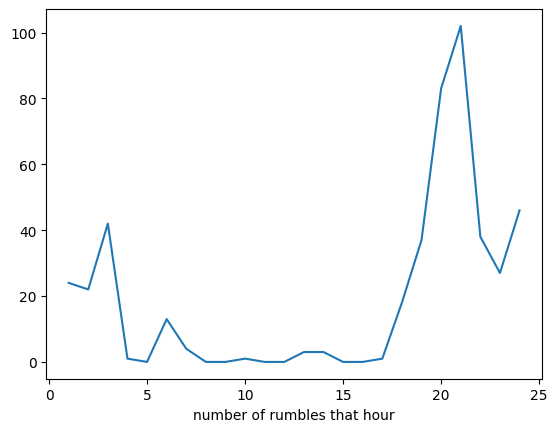

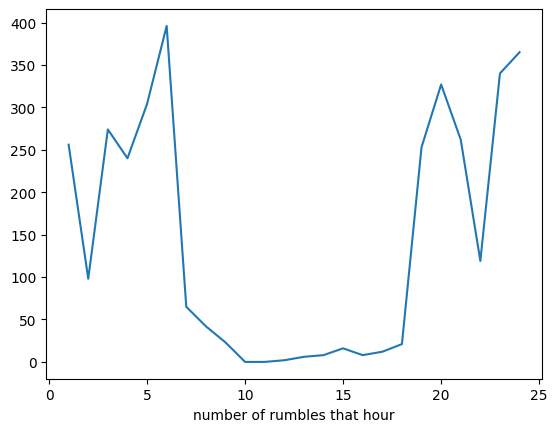

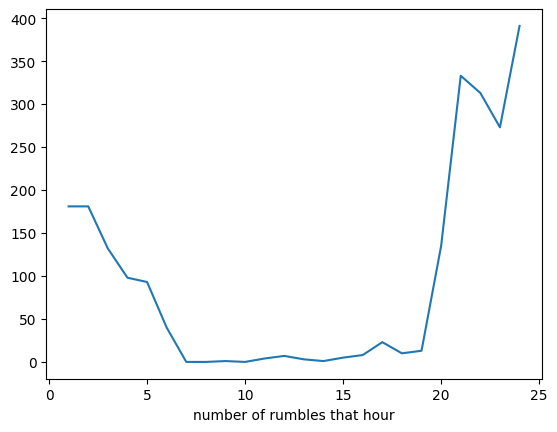

In [98]:
import ast
for i in [1,2,3]:
    row = training_df.iloc[i]

    begin_times = ast.literal_eval(row['Rumble File Offset (s)'])


    plot_events_hours(begin_times) 

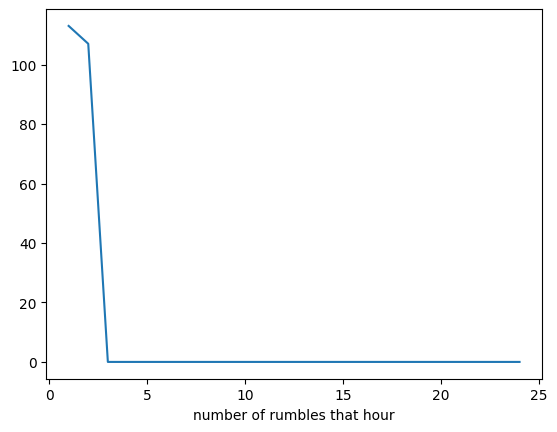

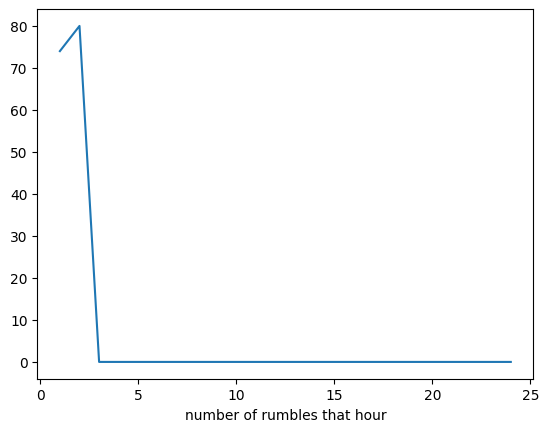

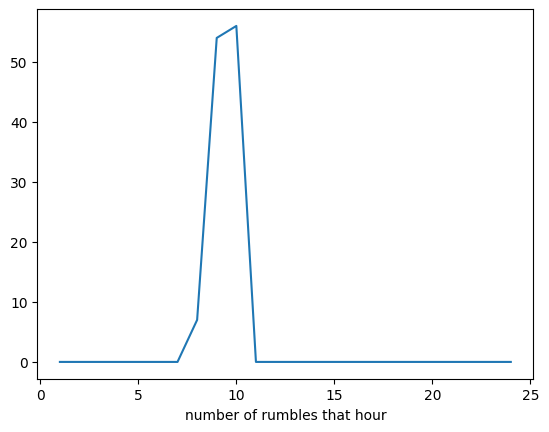

In [99]:
for i in [61, 62, 63]:
    row = training_df.iloc[i]

    begin_times = ast.literal_eval(row['Gunshot File Offset (s)'])


    plot_events_hours(begin_times) 

In [82]:
# Here we look at the lenghts of the clips
import seaborn as sns

def plot_durations(df, col):

    clip_durations = []

    for i, row in training_df.iterrows():
        durations = row[col]
        if type(durations) != float:
            durations = ast.literal_eval(row[col])

            clip_durations += durations
    sns.histplot(clip_durations)
    

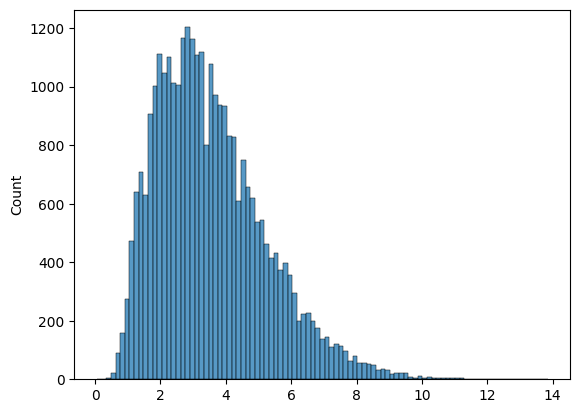

In [83]:
plot_durations(training_df, 'Rumble Duration (s)')

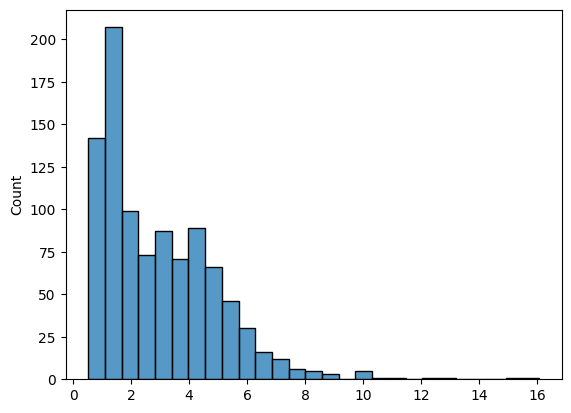

In [84]:
plot_durations(training_df, 'Gunshot Duration (s)')



## Conclusions

From this we can conclude two things:
We can use 6 seconds as a cutoff point and make every clip 6 seconds long as that will cover most of the cases. Clips that are longer than that will be thrown away.

Also most elephants don't seem to be active during a large portion of a day, but it is unclear which hours those are



[Text(0.5, 0, '% time')]

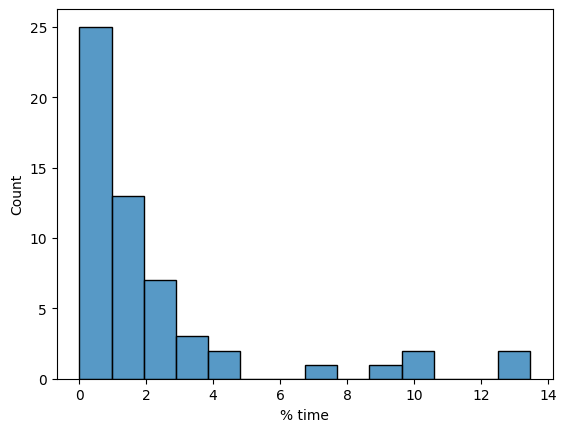

In [204]:
# Here we briefly check what percentage of the file contains rumble.
x = []
for i in range(56):
    row = training_df.iloc[i]
    begin_times = ast.literal_eval(row['Rumble File Offset (s)'])
    durations = ast.literal_eval(row['Rumble Duration (s)'])
    x.append(np.sum(durations) / (60 * 60 * 24) * 100)
    
ax = sns.histplot(x, )
ax.set(xlabel='% time')